In [1]:
%config Completer.use_jedi = False

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, InputLayer, Bidirectional, Dense, LSTMCell
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape([-1, 28, 28]).astype("float32") / 255.0
x_test = x_test.reshape([-1, 28, 28]).astype("float32") / 255.0

In [18]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(None, 28)))
model.add(LSTM(256, return_sequences=True, activation="tanh", recurrent_activation = 'sigmoid', use_bias = True, recurrent_dropout = 0, unroll = False))
model.add(LSTM(256, activation="tanh", recurrent_activation = 'sigmoid', use_bias = True, recurrent_dropout = 0, unroll = False))
model.add(Dense(10))

In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, None, 256)         291840    
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [21]:
EPOCHS = 20

In [22]:
history = model.fit(x_train, y_train, batch_size=64, epochs=EPOCHS, verbose=2)

Epoch 1/20
938/938 - 27s - loss: 0.2970 - accuracy: 0.9033
Epoch 2/20
938/938 - 27s - loss: 0.0867 - accuracy: 0.9729
Epoch 3/20
938/938 - 23s - loss: 0.0567 - accuracy: 0.9829
Epoch 4/20
938/938 - 28s - loss: 0.0460 - accuracy: 0.9857
Epoch 5/20
938/938 - 27s - loss: 0.0392 - accuracy: 0.9876
Epoch 6/20
938/938 - 27s - loss: 0.0324 - accuracy: 0.9901
Epoch 7/20
938/938 - 27s - loss: 0.0276 - accuracy: 0.9913
Epoch 8/20
938/938 - 25s - loss: 0.0230 - accuracy: 0.9930
Epoch 9/20
938/938 - 27s - loss: 0.0213 - accuracy: 0.9935
Epoch 10/20
938/938 - 29s - loss: 0.0180 - accuracy: 0.9942
Epoch 11/20
938/938 - 26s - loss: 0.0179 - accuracy: 0.9944
Epoch 12/20
938/938 - 29s - loss: 0.0145 - accuracy: 0.9951
Epoch 13/20
938/938 - 28s - loss: 0.0144 - accuracy: 0.9956
Epoch 14/20
938/938 - 29s - loss: 0.0119 - accuracy: 0.9961
Epoch 15/20
938/938 - 25s - loss: 0.0128 - accuracy: 0.9962
Epoch 16/20
938/938 - 28s - loss: 0.0111 - accuracy: 0.9968
Epoch 17/20
938/938 - 29s - loss: 0.0107 - accura

In [23]:
acc = history.history['accuracy']
loss=history.history['loss']
print(acc)
print(loss)

[0.9033166766166687, 0.9729499816894531, 0.982866644859314, 0.9857333302497864, 0.987583339214325, 0.9900500178337097, 0.991349995136261, 0.992983341217041, 0.993483304977417, 0.9942499995231628, 0.9944166541099548, 0.9950833320617676, 0.9955666661262512, 0.9960500001907349, 0.996233344078064, 0.9967666864395142, 0.996649980545044, 0.9968833327293396, 0.9975833296775818, 0.9973499774932861]
[0.29703351855278015, 0.08668271452188492, 0.056740421801805496, 0.04602989926934242, 0.03918980434536934, 0.03236222639679909, 0.02761256694793701, 0.02302369847893715, 0.021279146894812584, 0.017977561801671982, 0.017932917922735214, 0.014467381872236729, 0.014401223510503769, 0.011947053484618664, 0.012762466445565224, 0.011059789918363094, 0.010741589590907097, 0.009752432815730572, 0.007355252746492624, 0.008995008654892445]


Text(0.5, 1.0, 'Training Accuracy and Loss')

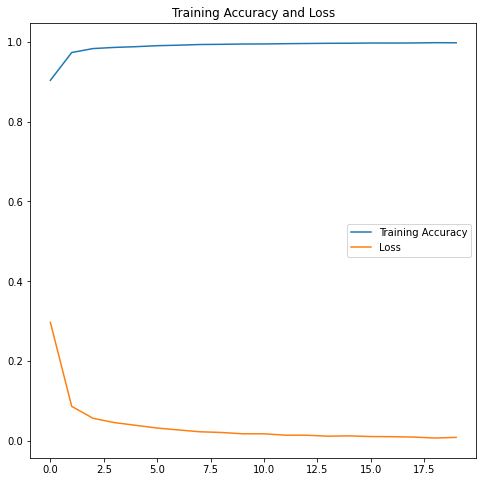

In [24]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='center right')
plt.title('Training Accuracy and Loss')

In [25]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

157/157 - 2s - loss: 0.0348 - accuracy: 0.9912


[0.03484715148806572, 0.9911999702453613]

In [28]:
model.save('saved_models/lstm_model.h5')

In [29]:
loaded_model = keras.models.load_model('saved_models/lstm_model.h5')

In [30]:
loaded_model.evaluate(x_test, y_test, batch_size=64, verbose=2)

157/157 - 2s - loss: 0.0348 - accuracy: 0.9912


[0.03484715148806572, 0.9911999702453613]